# Równoważenia obciążenia przez alokację shardów

Inicjalizacja środowiska

In [1]:
import pprint
import operator
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=1, width=140)

Inicjalizacja wektora obciążeń poszczególnych shardów (F)

In [2]:
np.random.seed(23456789)

F_base = np.random.randint(0,9, size=(250, 100))
pp.pprint(F_base)
print(np.array(F_base).shape)

array([[6, 6, 2, ..., 8, 8, 7],
       [6, 2, 1, ..., 4, 8, 0],
       [1, 8, 0, ..., 0, 8, 2],
       ...,
       [0, 0, 8, ..., 1, 1, 6],
       [8, 4, 7, ..., 2, 8, 1],
       [2, 0, 3, ..., 6, 7, 8]])
(250, 100)


Wyznaczenie ilości węzłów chmury (n)

In [3]:
n = 30

Wyznaczenie sumarycznego wektora obciążenia całej chmury

In [4]:
wts = list(map(sum, zip(*F_base)))

Wyznaczenie względnego obciążenia przypadającego na jeden węzeł chmury

In [5]:
nwts = sum(list(wts))

Sortowanie względem modułu

In [6]:
F=sorted([x * n for x in F_base],key=sum, reverse=True)

Alokowanie wektorów shardów względem posortowanego obciążenia

In [7]:
N = [[0 for y in F[x]] for x in range(0, n)]
R1 = [[0 for y in F[x]] for x in range(0, n)]

for R1_index, shard in enumerate(F):
    abs1 = sum(list(map(abs,list(map(operator.sub, wts,shard)))))
    maxValue = None
    maxNodeIndex = None

    for index, node in enumerate(N):
        
        if(sum(node) >= nwts):
            continue
            
        temp = [node,shard]
        abs2 =  sum(list(map(abs,map(operator.sub, wts, [sum(x) for x in zip(*temp)]))))
        value=abs2-abs1
        
        if(maxValue is None or value > maxValue):
            maxValue=value
            maxNodeIndex=index
    
    # suma dwoch wektorow
    N[maxNodeIndex]=list(map(operator.add, N[maxNodeIndex], list(shard)))
    
    # przydzielanie shardow losowe
    R1[R1_index%n]=list(map(operator.add, R1[R1_index%n], F_base[R1_index]))
    

#powrocenie do zmniejszonej o n 
N=[[x/n for x in f] for f in N]

Określenie średniej mocy chmury

In [8]:
power = 25

Wyznaczenie średniego obciążenia w czasie każdego węzła chmury(algorytm vs losowy przydział)

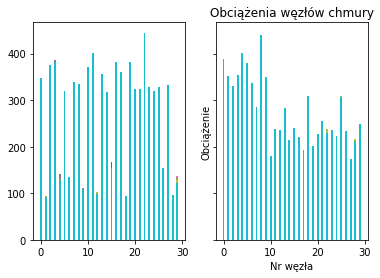

In [26]:
width = 0.4
Narray = np.transpose(np.array(N))
NR1array = np.transpose(np.array(R1))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ind = np.arange(n)
for index, value in enumerate(N):
    ax1.bar(range(0,n ), list(Narray[index]), width)
    ax2.bar(range(0,n ), list(NR1array[index]), width)
        
plt.xlabel("Nr węzła")
plt.ylabel("Obciążenie")
plt.title("Obciążenia węzłów chmury")
plt.show()

Wyznaczenie średniego przeciążenia każdego węzła chmury

In [11]:
loadN = list()
for node in N:
    nodeLoad = 0
    for index, value in enumerate(node):
        load = value-power
        if(load > 0):
            if(index < len(node)-1):
                node[index+1] += load
            nodeLoad += load
        
    loadN.append(nodeLoad)

Wyznaczenie średniego przeciążenia każdego węzła dla losowego przydziału

In [12]:
loadR1 = list()
for node in R1:
    nodeLoad = 0
    for index, value in enumerate(node):
        load = value-power
        if(load > 0):
            if(index < len(node)-1):
                node[index+1] += load
            nodeLoad += load
        
    loadR1.append(nodeLoad)

Opóżnienia z algorytmem

In [13]:
print(sum(loadN))

1261295.0


Opóznienia przydzielanie losowe

In [14]:
print(sum(loadR1))

1262969


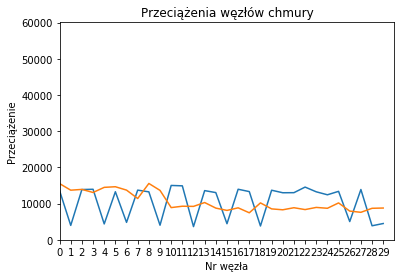

In [19]:
loadN_powerRelated = [x/(len(F_base[0]))*power for x in loadN]
plt.plot(loadN_powerRelated)

loadR1_powerRelated = [x/(len(F_base[0]))*power for x in loadR1]
plt.plot(loadR1_powerRelated)

plt.xlabel("Nr węzła")
plt.ylabel("Przeciążenie")
plt.axis([0, n, 0, max(loadN)])
plt.xticks(range(0,n))
plt.title("Przeciążenia węzłów chmury")
plt.show()